In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import inception_resnet_v2


import pickle
from skimage.transform import resize
from skimage.io import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/multi_label_model')

In [ ]:
opener = open(f'drive/MyDrive/dict_of_labels.pickle', 'rb')
named_labels = pickle.load(opener)
opener.close()

In [ ]:
print(list(named_labels.items())[0:59])

[(0, 'Chihuahua'), (1, 'Japanese_spaniel'), (2, 'Maltese_dog'), (3, 'Pekinese'), (4, 'Shih_Tzu'), (5, 'Blenheim_spaniel'), (6, 'papillon'), (7, 'toy_terrier'), (8, 'Rhodesian_ridgeback'), (9, 'Afghan_hound'), (10, 'basset'), (11, 'beagle'), (12, 'bloodhound'), (13, 'bluetick'), (14, 'black_and_tan_coonhound'), (15, 'Walker_hound'), (16, 'English_foxhound'), (17, 'redbone'), (18, 'borzoi'), (19, 'Irish_wolfhound'), (20, 'Italian_greyhound'), (21, 'whippet'), (22, 'Ibizan_hound'), (23, 'Norwegian_elkhound'), (24, 'otterhound'), (25, 'Saluki'), (26, 'Scottish_deerhound'), (27, 'Weimaraner'), (28, 'Staffordshire_bullterrier'), (29, 'American_Staffordshire_terrier'), (30, 'Bedlington_terrier'), (31, 'Border_terrier'), (32, 'Kerry_blue_terrier'), (33, 'Irish_terrier'), (34, 'Norfolk_terrier'), (35, 'Norwich_terrier'), (36, 'Yorkshire_terrier'), (37, 'wire'), (38, 'Lakeland_terrier'), (39, 'Sealyham_terrier'), (40, 'Airedale'), (41, 'cairn'), (42, 'Australian_terrier'), (43, 'Dandie_Dinmont')

In [ ]:
def name_the_breed(raw_picture, model, named_labels):
  picture = resize(raw_picture, (299, 299), preserve_range = True)
  picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
  picture = tf.expand_dims(picture, axis = 0)
  predictions1 = model.predict(picture)
  predictions = predictions1[0]
  prediction = max(predictions)
  predictions = list(predictions)
  index = list(predictions).index(prediction)
  score1 = f'This is a {named_labels[index]} with {round((100 * prediction), 2)} % certainty'
  indexvalues = list(predictions)
  predictions.sort()
  max2 = predictions[-2]
  index2 = indexvalues.index(max2)
  score2 = f'2nd prediction - {named_labels[index2]} with {round((100 * max2), 2)} % certainty'
  return  [score1, score2, predictions1]

### Predicting two different looking dogs of same breed - Cairn Terrier

In [ ]:
dog_image = 'https://media.istockphoto.com/photos/playful-happy-smiling-pet-dog-running-in-the-grass-picture-id1320018473?b=1&k=20&m=1320018473&s=170667a&w=0&h=Q-U9yI4JjCJYSAzXZwpnM4HuaXPzo4K-vBsgO7lanyo='
dog_image = imread(dog_image)
# print("dog image ",dog_image.shape)
# print(dog_image)
picture = resize(dog_image, (299, 299), preserve_range = True)
# print("resized image ",picture.shape)
# print(picture)
picture = tf.keras.applications.inception_resnet_v2.preprocess_input(picture)
# print("preprocessed image ",picture.shape)
# print(picture)
picture = tf.expand_dims(picture, axis = 0)
print("dim expanded image ",picture.shape)
print(picture)
# plt.imshow(dog_image)
# [score1, prediction2, pArr] = name_the_breed(dog_image, model, named_labels=named_labels)
# plt.title(score1)
# print(prediction2)
# print(pArr)

dim expanded image  (1, 299, 299, 3)
tf.Tensor(
[[[[-0.61113516 -0.51701751 -1.        ]
   [-0.641747   -0.53909109 -0.99996048]
   [-0.68235294 -0.56652487 -0.99955407]
   ...
   [-0.65227068 -0.58390306 -0.96963735]
   [-0.6913896  -0.59748163 -0.97602466]
   [-0.70875024 -0.61934553 -0.97131172]]

  [[-0.62120795 -0.52842809 -1.        ]
   [-0.65170122 -0.54916388 -0.99796708]
   [-0.68999847 -0.58262181 -0.9897296 ]
   ...
   [-0.64078956 -0.55051391 -0.96090235]
   [-0.66786019 -0.5658994  -0.96972811]
   [-0.68993377 -0.5975208  -0.97081758]]

  [[-0.63867795 -0.55240344 -1.        ]
   [-0.66859466 -0.56866592 -0.99369139]
   [-0.6938495  -0.59827602 -0.98015608]
   ...
   [-0.63428422 -0.53689495 -0.95299509]
   [-0.66135484 -0.5614261  -0.97934203]
   [-0.68200786 -0.5986934  -0.98673603]]

  ...

  [[ 0.07877646  0.25835953 -0.64678748]
   [ 0.10334928  0.2680167  -0.59320436]
   [ 0.15418716  0.30201908 -0.51794727]
   ...
   [-0.03506387  0.08107345 -0.62445334]
   [ 0.05

Text(0.5, 1.0, 'This is a Staffordshire_bullterrier with 16.53 % certainty')

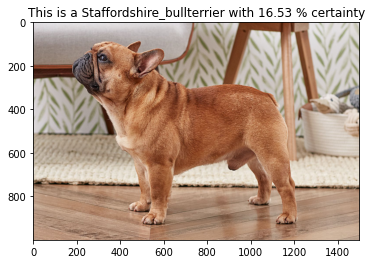

In [ ]:
dog_image = 'https://www.thesprucepets.com/thmb/BgUfhLLhJynspt3BSSAPr_VnCtw=/1500x1000/filters:fill(auto,1)/french-bulldog-breed-profile-1117966-hero-4f2e84633a854d4c8edf6e1f588aaa64.jpeg'
dog_image = imread(dog_image)
plt.imshow(dog_image)
[score1, prediction, prediction2] = name_the_breed(dog_image, model, named_labels=named_labels)
plt.title(score1)

ValueError: ignored

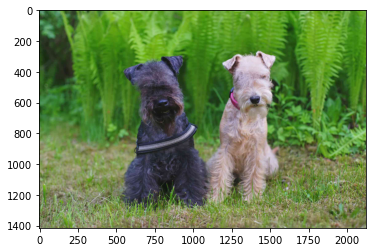

In [ ]:

dog_image = 'https://image.shutterstock.com/image-photo/cairn-terrier-plays-garden-260nw-727720204.jpg'
dog_image = imread(dog_image)
plt.imshow(dog_image)
[score1, prediction, prediction2] = name_the_breed(dog_image, model, named_labels=named_labels)
plt.title(score1)

In [ ]:
dog_image = 'https://www.thesprucepets.com/thmb/hwi8-RKyISg-FGGQ2BA2IeGrBVE=/2167x1445/filters:fill(auto,1)/GettyImages-1305946491-ccd5e4b3b1994760b562b4a08a3659e4.jpg'
dog_image = imread(dog_image)
plt.imshow(dog_image)
[score1, prediction2] = name_the_breed(dog_image, model, named_labels=named_labels)
plt.title(score1)
print(prediction2)